<a href="https://colab.research.google.com/github/DanielKoklev/MachineLearning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-18 17:03:28--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-18 17:03:28 (49.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # Make it a 2D array of size N x D where D = 1
Y = data[:,1]

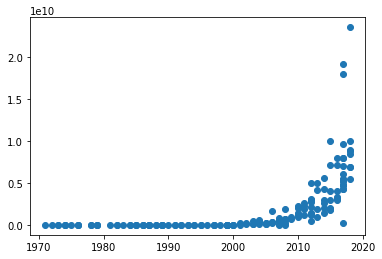

In [7]:
# Plot the data - it is exponential !
plt.scatter(X, Y)

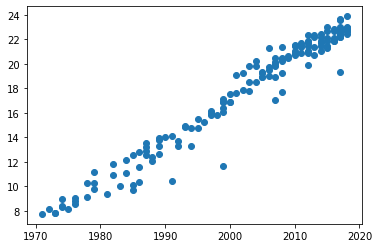

In [8]:
# We want a linear model, so let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [9]:
# Centering the X data so the values aren't too large
X = X - X.mean()

In [11]:
# Creating tf model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse') # for loss function we use mean square error
# alternative
# model.compile(optimizer='adam', loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])




Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 317.2479 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 290.0057 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 247.8252 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 188.6005 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 149.3577 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 125.5046 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 92.8867 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 64.7141 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 56.0085 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 16ms/step - loss: 36.8085 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss:

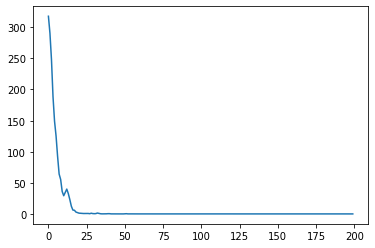

In [12]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')


In [13]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34486893]], dtype=float32), array([17.755726], dtype=float32)]


In [14]:
a = model.layers[0].get_weights()[0][0,0]

In [15]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0098858548658085
